# Calculating our grades

You can have **variables** that store data. We store percentages (such as the __weight__ of each assignment type) as a number between 0 and 1, where 0 is 0%, .50 is 50%, and 1.00 is 100%.

Lets take the syllabus for a course you may be currently enrolled in: COMM 100C:

* Section Assignments & Participation 30%
* Weekly Assessments 20%
* Midterm 20%
* Final 30%

In [1]:
participation_weight = .30
assignments_weight = .20
midterm_weight = .20
final_weight = .30

Did we get that right? Does it all add up to 1 (that is, 100%)?

In [2]:
participation_weight + assignments_weight + midterm_weight + final_weight

1.0

Now lets set our grades to be:
* Participation: 100%
* Assignments (average across all): 80%
* Midterm: 100%
* Final: 90%

In [3]:
participation_grade = 1.00
assignments_grade = .80
midterm_grade = 1.00
final_grade = .90

Then we can have a big formula that multiplies each grade by the weight, then adds them up:

In [4]:
(participation_grade * participation_weight) + (assignments_grade * assignments_weight) + (midterm_grade * midterm_weight) + (final_grade * final_weight)

0.93

This means our grade would be 93/100.

You can also break lines up to make it more readable using `\` --- if you don't, it will assume each new line is a new instruction

In [5]:
(participation_grade * participation_weight) + \
(assignments_grade * assignments_weight) + \
(midterm_grade * midterm_weight) + \
(final_grade * final_weight)

0.93

### Multiple assignments within a grade category

But typically you have a lot of assignments within a category, like having 10 weekly reflection assignments. So we can do a two-step process of calculating our average (or __mean__) grade for the weekly reflection assignments, then store that as the `assignments_grade`. Then we can re-run that first fomula.

To store lists of numbers, we can use a __list__. In python, we specify we are making a list by putting square brackets around a set of numbers and variables, separated by commas. Lets say that our assignments are graded on a scale of 0-5 and our grades were: 0, 5, 1, 3, 5, 3, 4, 5, 5, and 5:

In [6]:
assignments_list = [0,5,1,3,5,3,4,5,5,5]

#### Calculating the average of a list of numbers

We want to find the average score, then multiply this by the assignment weight. There are a few different ways we can find the average of a list of numbers. We could add up all the numbers, and then divide by the number of items. There are a few __built-in__ functions that you can use, like `sum()` (to add all them together, aka total) and `len()` (for length, aka number of items in the list)

In [7]:
sum(assignments_list)

36

In [8]:
len(assignments_list)

10

In [9]:
assignments_average = sum(assignments_list) / len(assignments_list)
assignments_average

3.6

But what what we actually want is the percent we got for this score. Assignments are out of a max of 5, so we divide our `assignments_average` by the points possible, which is 5:

In [10]:
assignments_max = 5
assignments_grade = assignments_average / assignments_max
assignments_grade

0.72

So this means we got 72% average for our assignments, which is 30% (or .30) of our total grade. 

#### Averages with numpy library

We can do it this way, but one of the great things about python is that people have written all kinds of general-purpose ___libraries___ that you can ___import___ and then use the functions they have created. ___numpy___ is a very powerful and popular library. Once you have imported a library, you can call its functions with a .

There are lots of libraries, and each of them has lots of functions! These are described in the library's documentation in far too much detail, but also in lots of posts on sites like StackOverflow and GitHub. You can also type numpy. and then hit tab to see all the possible functions. You can put `?` at the end of a function to get info about it:

In [11]:
import numpy

In [12]:
numpy.mean(assignments_list)

3.6

In [13]:
numpy.median(assignments_list)

4.5

In [14]:
numpy.sort(assignments_list)

array([0, 1, 3, 3, 4, 5, 5, 5, 5, 5])

In [15]:
numpy.sort?

So lets use the `numpy.mean()` function and store that as `assignments_average`, then divide by the max score:

In [16]:
assignments_average = sum(assignments_list) / len(assignments_list)
assignments_average


3.6

In [17]:
assignments_max = 5
assignments_grade = assignments_average / assignments_max
assignments_grade

0.72

So now we can call the formula we had at the beginning of the notebook again. Because we changed `assignments_grade`, that will be updated. But just for our clarity, we will store the other variables for participation, midterm, and final again: 

In [18]:
participation_grade = 1.00
midterm_grade = 1.00
final_grade = .90

participation_weight = .30
assignments_weight = .20
midterm_weight = .20
final_weight = .30

In [19]:
(participation_grade * participation_weight) + \
(assignments_grade * assignments_weight) + \
(midterm_grade * midterm_weight) + \
(final_grade * final_weight)

0.9139999999999999

## Dropping the lowest grades

But what about if you have an assignment group where the lowest 1 or 2 grades are dropped? We can use functions to handle that as well. First we need to sort the list from smallest to largest:

In [20]:
assignments_list = numpy.sort(assignments_list)
assignments_list

array([0, 1, 3, 3, 4, 5, 5, 5, 5, 5])

Then we will remove the first item from the list. There are a lot of ways to do this. One way to do this is to use the ___index selection___ method, which is called with square brackets, instead of parentheses:
`assignments_list[start:end]`. But note that the first item is 0, so the 10th item is actually 9. This is confusing at first, there are lots of memes about starting to count from 0:

In [21]:
assignments_list[0:9]

array([0, 1, 3, 3, 4, 5, 5, 5, 5])

Selecting everything after the first item (dropping lowest):

In [22]:
assignments_list[1:9]

array([1, 3, 3, 4, 5, 5, 5, 5])

Selecting everything after the first two items (dropping lowest two):

In [23]:
assignments_list[2:9]

array([3, 3, 4, 5, 5, 5, 5])

FYI, when you do a select, the items you don't select are still there in the original list. They aren't deleted:

In [24]:
assignments_list

array([0, 1, 3, 3, 4, 5, 5, 5, 5, 5])

If we don't specify a start position, it defaults to the beginning of the list. If we don't specify an end position, it defaults to the end of the list. So to select everything but the first (0th, lowest grade after sorting), we can do:

In [25]:
assignments_list[1:]

array([1, 3, 3, 4, 5, 5, 5, 5, 5])

Lets calculate the grade again, but only selecting everything but the lowest grade.

In [26]:
assignments_average = numpy.mean(assignments_list[1:])
assignments_average

4.0

In [27]:
assignments_max = 5
assignments_grade = assignments_average / assignments_max
assignments_grade

0.8

And now we can re-run that big function that calculates all the grades:

In [28]:
class_grade = (participation_grade * participation_weight) + \
(assignments_grade * assignments_weight) + \
(midterm_grade * midterm_weight) + \
(final_grade * final_weight)

class_grade

0.93

## Custom functions

You can define your own functions. These use a bunch of ___if___ and ___elif___ (short for "else if") statements. It goes through each if/elif, checks the condition, and if it matches that condition, it does whatever is indented below. In this case, it returns a different letter grade. If the grade is not greater than .94, it then checks if it is greater than .9, and if not, then it checks if the grade is higher than .87, and so on.

This also shows you that indentation (or tabs) can be very important and tricky in python. We will get to that later, but just notice how the indentation implies a structure:

In [29]:
def calc_letter_grade(grade):
    if grade > .94:
        return 'A'
    
    elif grade > .9:      
        return 'A-'
    
    elif grade > .87:
        return 'B+'
    
    elif grade > .84:   
        return 'B'
    
    elif grade > .8:
        return 'B-'
    
    elif grade > .77:
        return 'C+'
    
    elif grade > .7:
        return 'C'
    
    elif grade > .6:
        return 'D'
    
    elif grade >= 0:
        return 'F'
    
    else:
        return 'ERROR'

In [30]:
calc_letter_grade(.9)

'B+'

In [31]:
calc_letter_grade(.3)

'F'

In [32]:
calc_letter_grade("one hundred")

TypeError: '>' not supported between instances of 'str' and 'float'

This gives us an error, because python has no idea what we mean when we ask if the __str__ing "one hundred" is greater than the number .94. It does not let you use the greater than sign to compare a string and a number (numbers with decimal points are called ___floats___).

To wrap it all up:

In [33]:
class_grade = (participation_grade * participation_weight) + \
(assignments_grade * assignments_weight) + \
(midterm_grade * midterm_weight) + \
(final_grade * final_weight)

calc_letter_grade(class_grade)

'A-'

## Pandas

Pandas is a more powerful __software library__ that contains a lot of pre-written code for working with data, where most of what you need to do is supported with built-in functions.

In [34]:
import pandas

In [35]:
grade_series = pandas.Series(assignments_list)
grade_series

0    0
1    1
2    3
3    3
4    4
5    5
6    5
7    5
8    5
9    5
dtype: int64

Statisticians like to use "mean" instead of average, but they are the same for our purposes.

In [36]:
grade_series.mean()

3.6

In [37]:
grade_series.describe()

count    10.000000
mean      3.600000
std       1.837873
min       0.000000
25%       3.000000
50%       4.500000
75%       5.000000
max       5.000000
dtype: float64

We can even make plots with the .plot() function. You can specify a kind of plot, as I did with this __hist__ogram.

<AxesSubplot:ylabel='Frequency'>

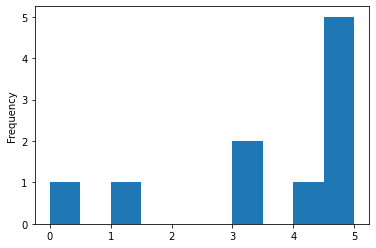

In [38]:
grade_series.plot(kind='hist')